<a href="https://colab.research.google.com/github/yashaswinipj/ISRO-project/blob/master/seg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [0]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [3]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving g1.jpg to g1.jpg
User uploaded file "g1.jpg" with length 15914 bytes


In [4]:
import os
!ls
os.getcwd()

g1.jpg	sample_data


'/content'

In [6]:
import cv2
items = os.listdir('/content')
print (items)
for each_image in items:
  if each_image.endswith(".jpg"):
   print (each_image)
   full_path = "/content/" + each_image
   print (full_path)
   image = cv2.imread(full_path)
   print (image)

['.config', 'g1.jpg', 'sample_data']
g1.jpg
/content/g1.jpg
[[[ 79  70  56]
  [171 162 148]
  [226 217 203]
  ...
  [169 151 140]
  [110  96  84]
  [165 151 139]]

 [[ 66  57  43]
  [167 158 144]
  [221 212 198]
  ...
  [166 150 138]
  [125 113 101]
  [158 146 136]]

 [[ 58  50  33]
  [137 129 112]
  [219 210 196]
  ...
  [177 168 155]
  [148 142 131]
  [124 117 108]]

 ...

 [[110 113 117]
  [ 57  61  62]
  [ 38  42  43]
  ...
  [103 127 169]
  [100 125 165]
  [ 96 120 162]]

 [[ 92  98 103]
  [ 48  55  58]
  [ 12  19  22]
  ...
  [ 99 122 167]
  [107 131 173]
  [117 140 185]]

 [[ 83  92  96]
  [ 59  68  72]
  [ 26  35  39]
  ...
  [ 99 122 167]
  [107 130 175]
  [117 140 185]]]


['.config', 'g1.jpg', 'sample_data']
g1.jpg
/content/g1.jpg


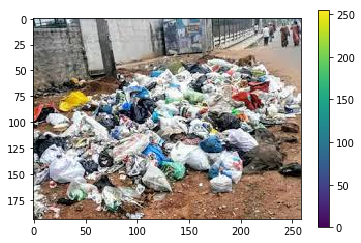

In [7]:
import matplotlib.pyplot as plt
import os
import cv2
items = os.listdir('/content')
print (items)    

for each_image in items:
  if each_image.endswith(".jpg"):
    print (each_image)
    full_path = "/content/" + each_image
    print (full_path)
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)

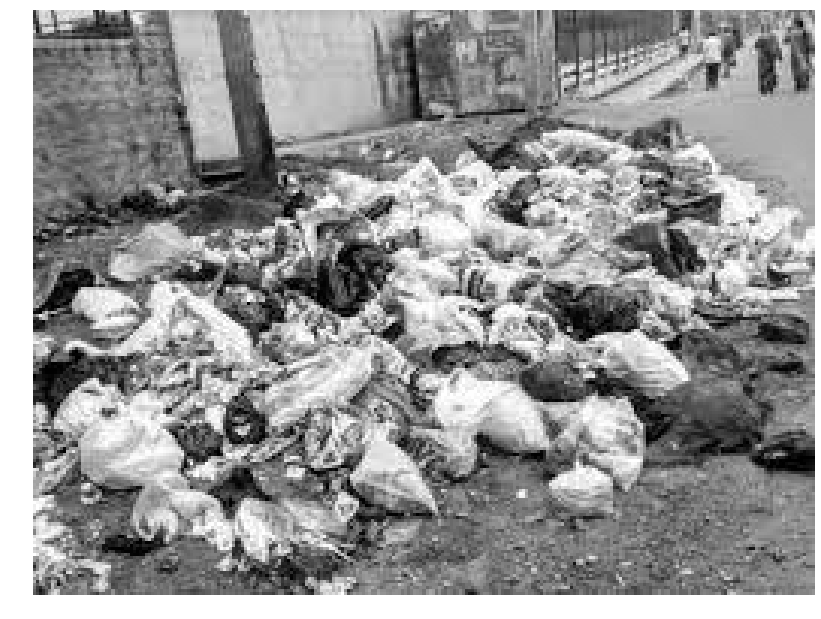

In [23]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);

In [0]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [100, 125], 110)[:-1]

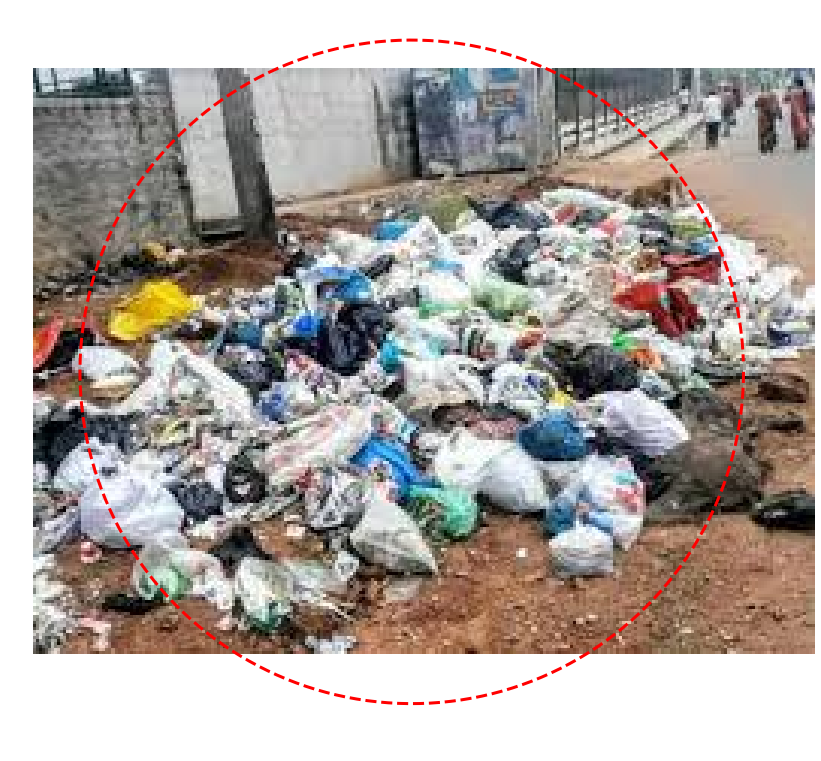

In [35]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

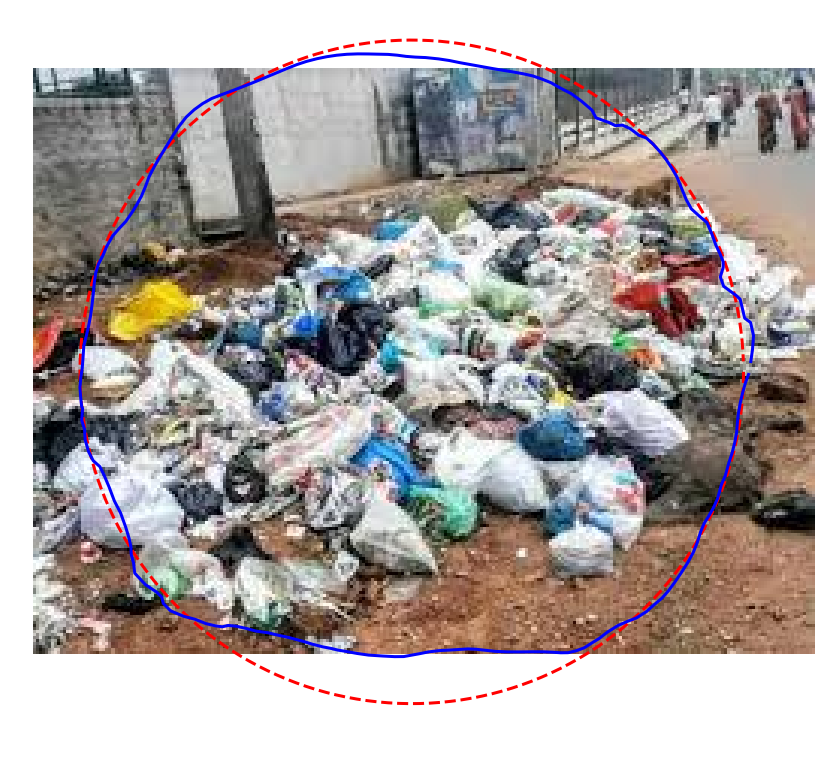

In [36]:
snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

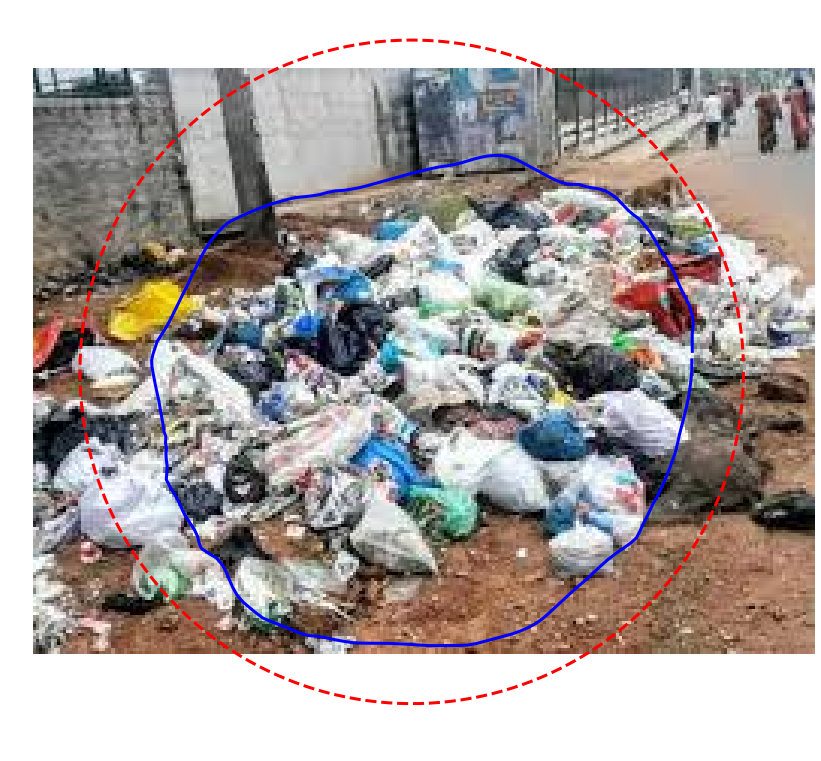

In [45]:
snake = seg.active_contour(image_gray, points,alpha=0.2,beta=0.2)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [0]:
image_slic = seg.slic(image,n_segments=155)

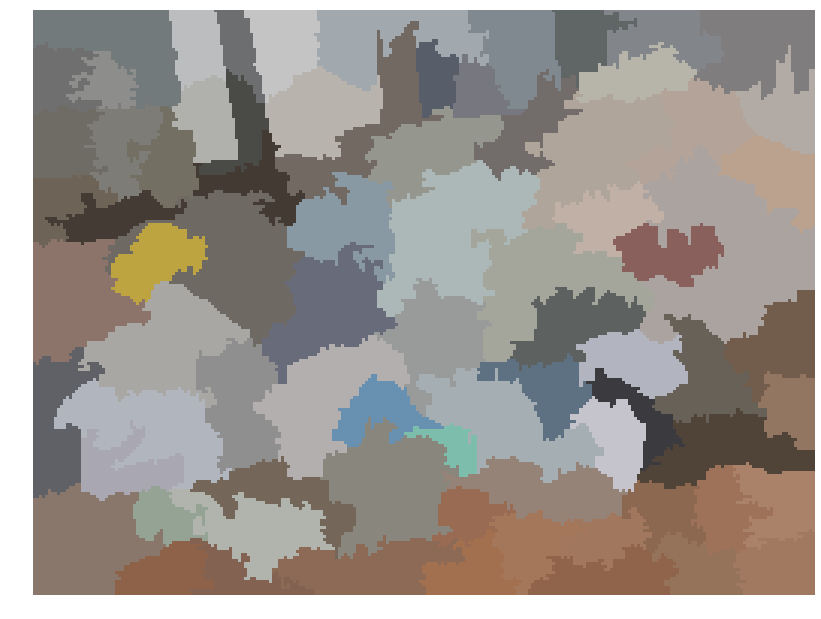

In [50]:
image_show(color.label2rgb(image_slic, image, kind='avg'));